<a href="https://colab.research.google.com/github/KubraErensoy/AirlinesSatisfaction/blob/main/AirlinesCustomerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from typing_extensions import Self
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr
import warnings
warnings.filterwarnings("ignore")

                               Column   Dtypes  Nunique  Sum_null
0                        satisfaction   object        2         0
1                              Gender   object        2         0
2                       Customer Type   object        2         0
3                                 Age    int64       75         0
4                      Type of Travel   object        2         0
5                               Class   object        3         0
6                     Flight Distance    int64     5398         0
7                        Seat comfort    int64        6         0
8   Departure/Arrival time convenient    int64        6         0
9                      Food and drink    int64        6         0
10                      Gate location    int64        6         0
11              Inflight wifi service    int64        6         0
12             Inflight entertainment    int64        6         0
13                     Online support    int64        6         0
14        

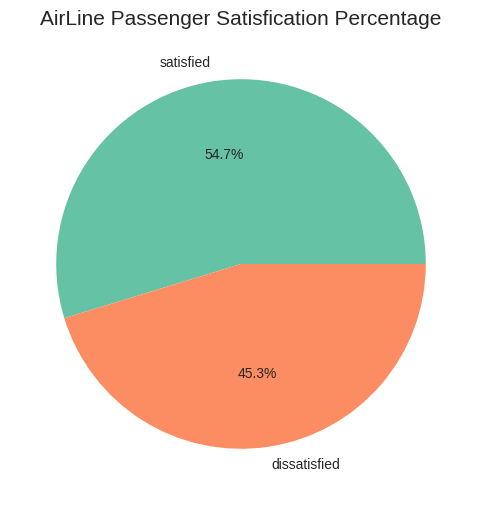

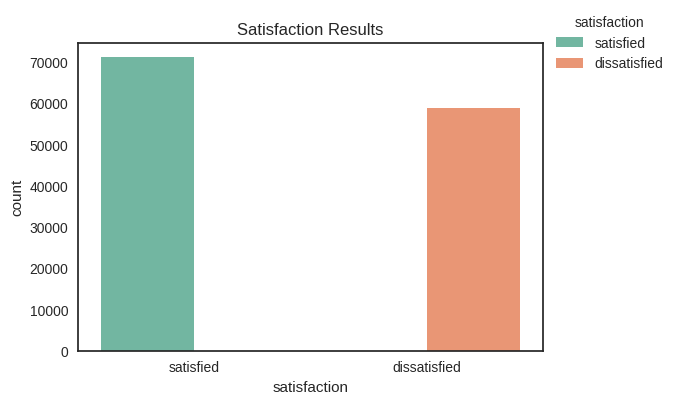

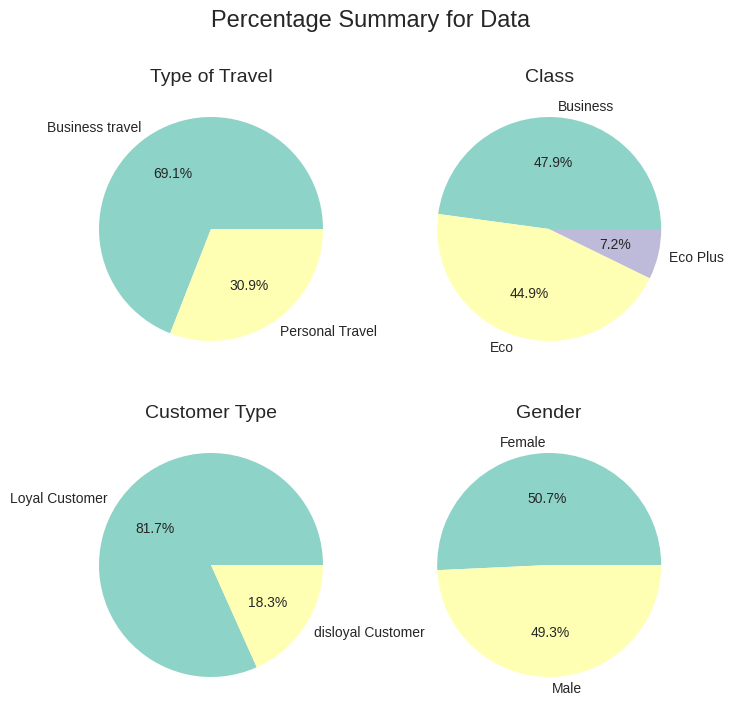

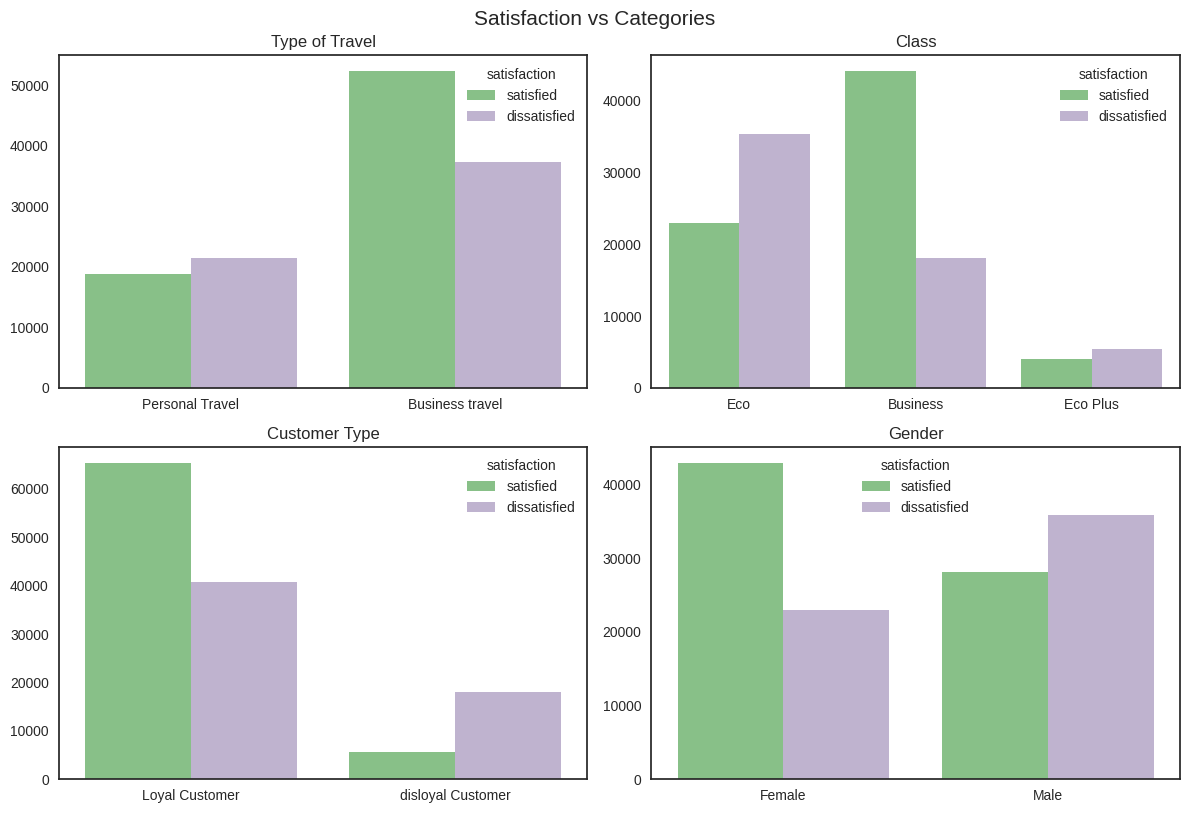

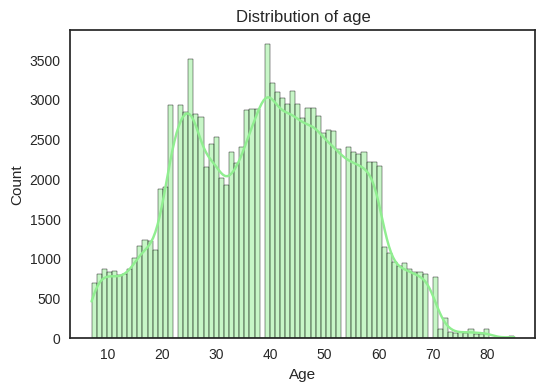

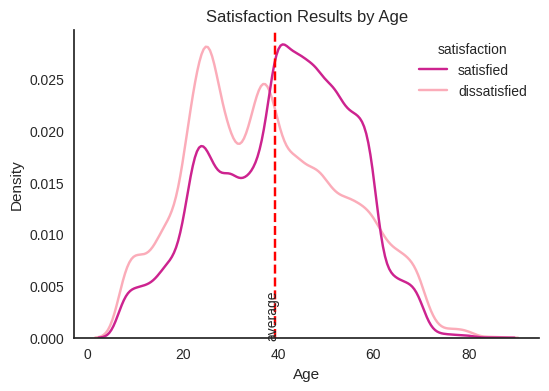

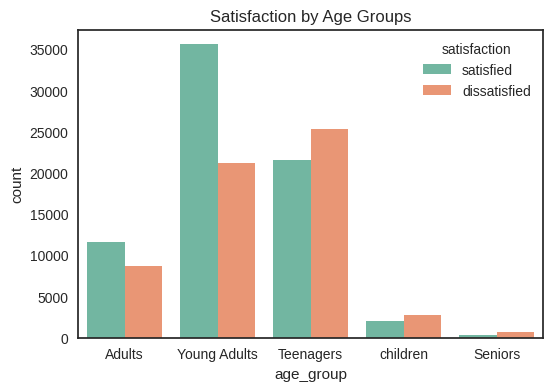

<Figure size 600x400 with 0 Axes>

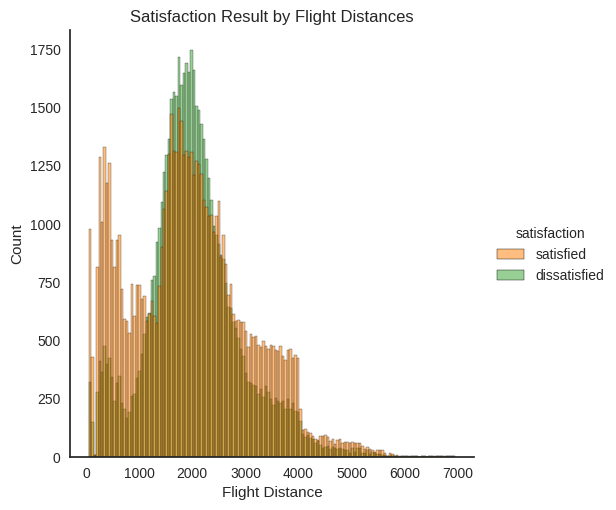

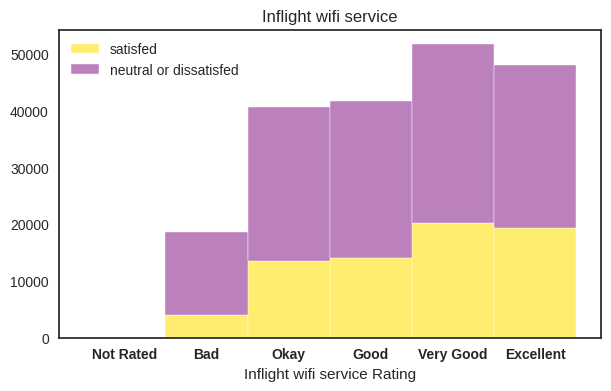

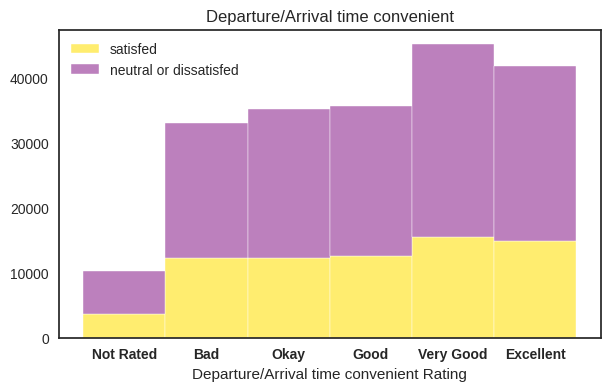

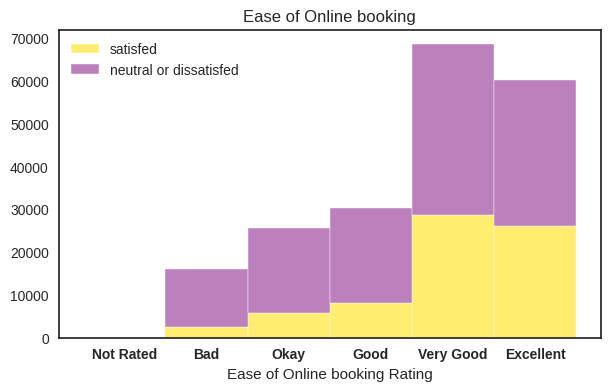

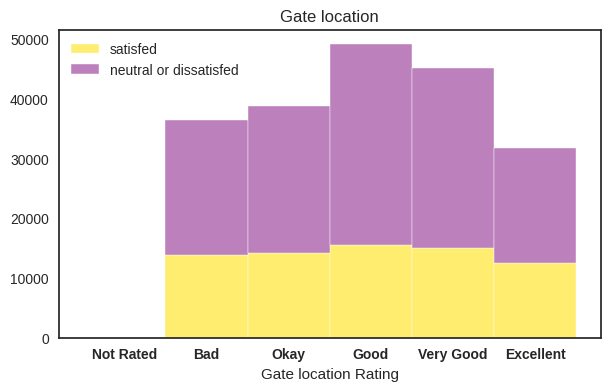

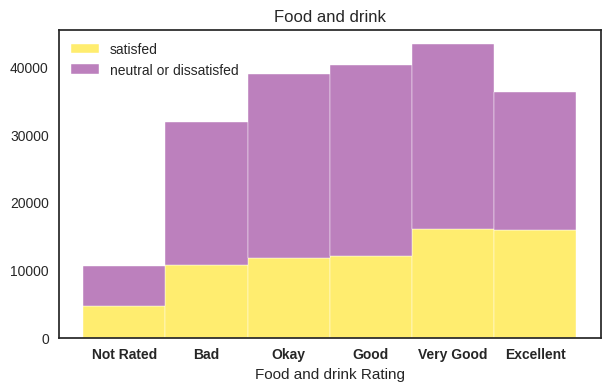

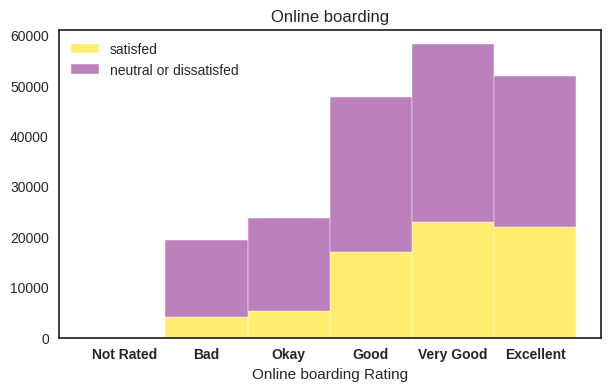

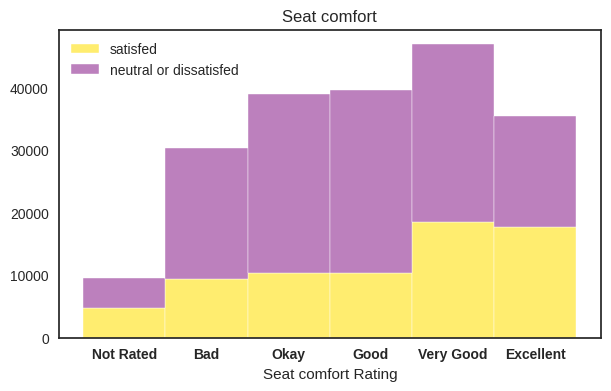

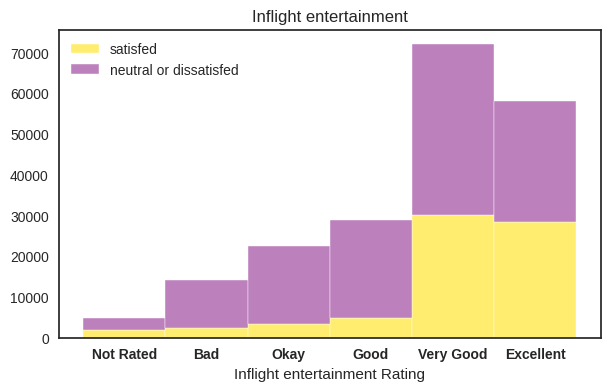

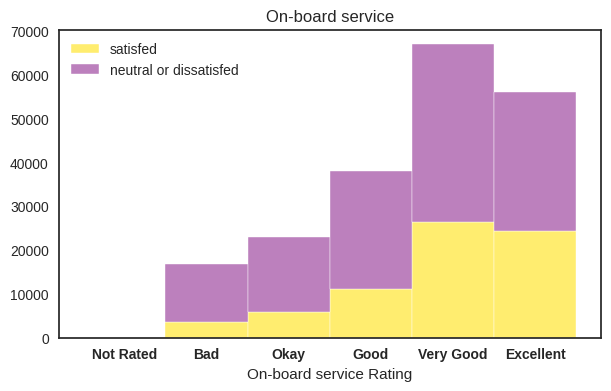

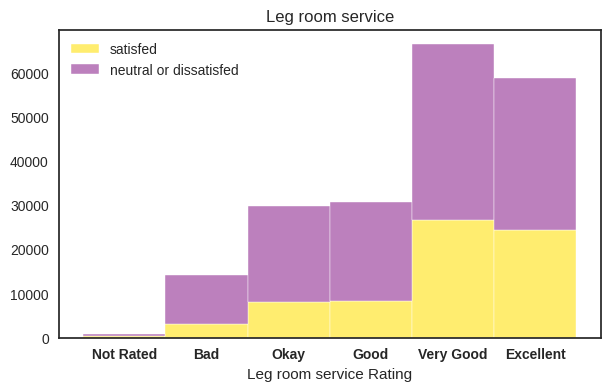

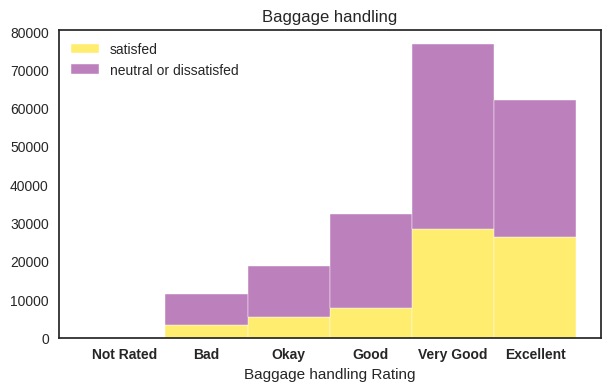

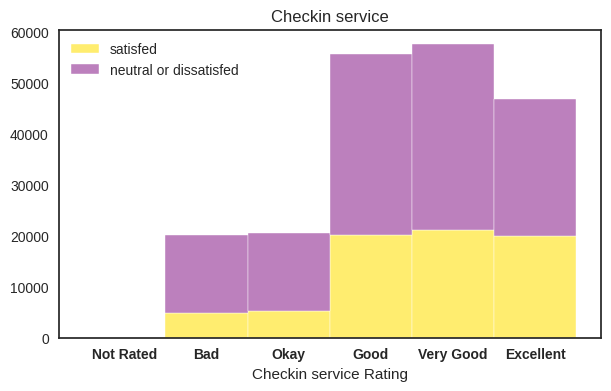

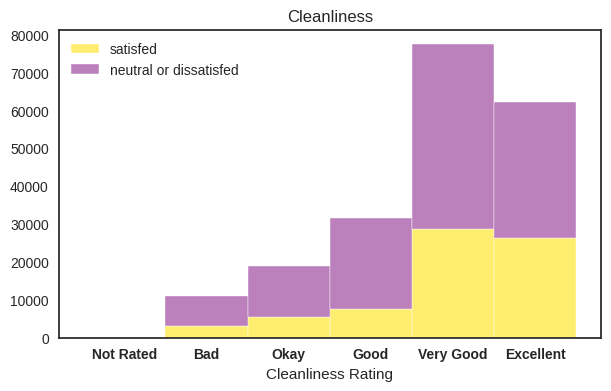

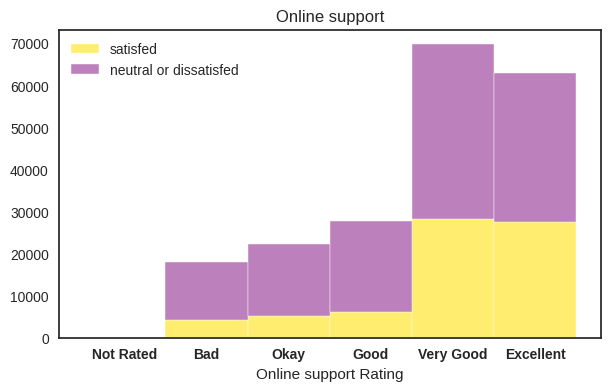

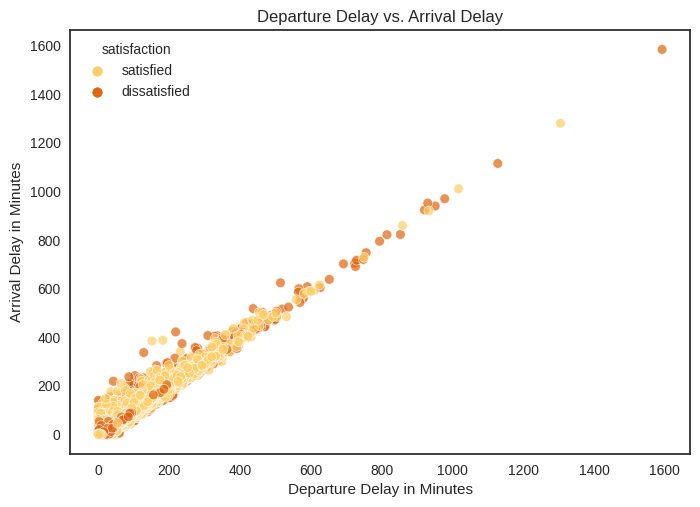

<Figure size 500x300 with 0 Axes>

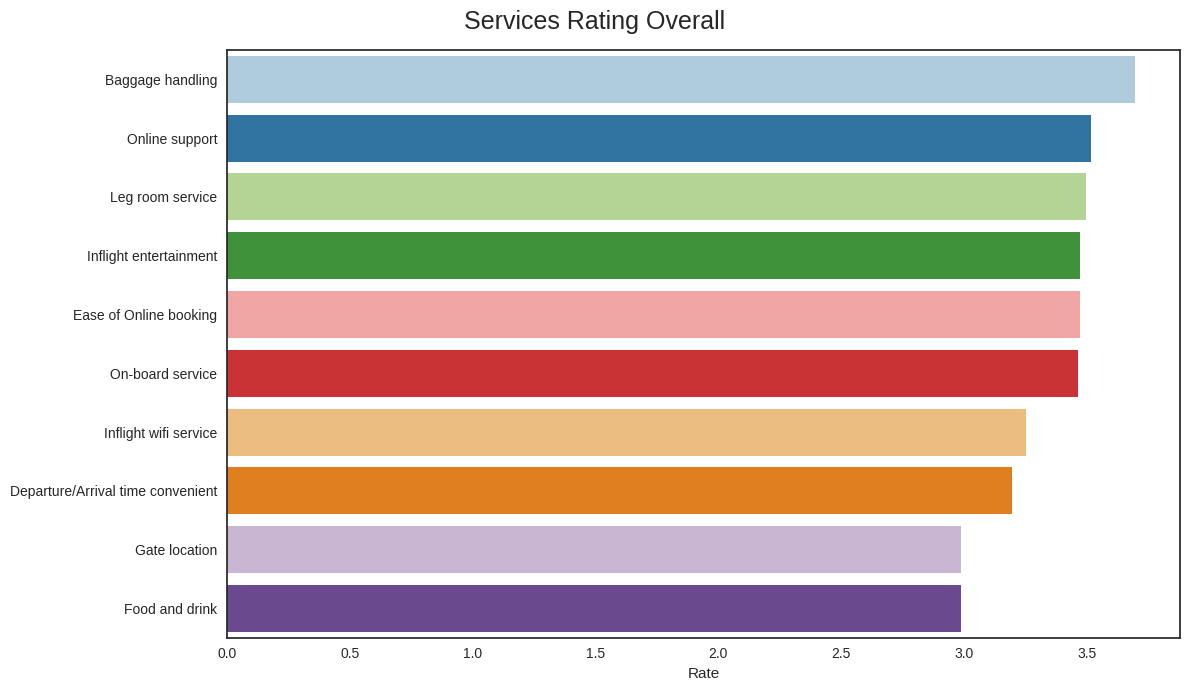

In [75]:

class Airline:
  def __init__(self, file_path):
    self.file_path = file_path
    self.df = None
    self.read_file()
    self.data_exploration()
    self.satisfaction_percentage()
    self.satisfaction_results()
    self.per_data()
    self.satisfaction_categories()
    #self.per_sum_data()
    self.age_distrubiton()
    self.satisfaction_result_by_age()
    self.age_group1()
    self.flight_distances_satisfaction()
    self.categories_satisfaction()
    self.deparature_arrival_satisfaction()
    self.service_rating_overall()
    #self.plot_age_groups_visualization()
    #self.plot_categories_grouped()
    #self.plot_rating_columns_visualization()
    #self.plot_satisfied_withdelay_vs_dissatisfied()

  def read_file(self):
    self.df = pd.read_csv(self.file_path)

# data explore
  def data_exploration(self):
    data=[]
    columns=self.df.columns
    for column in columns:
        dtypes=self.df[column].dtypes
        nunique=self.df[column].nunique()
        sum_null=self.df[column].isnull().sum()
        #duplicate=self.df[column].duplicated().sum()
        data.append([column,dtypes,nunique,sum_null])
    df_summary=pd.DataFrame(data)
    df_summary.columns=['Column','Dtypes','Nunique','Sum_null']
    print(df_summary)
    return df_summary

  def satisfaction_results(self):

      plt.figure(figsize=(6,4))
      sns.countplot(x='satisfaction',data=self.df,hue='satisfaction',palette='Set2')
      #sns.despine(top=True,right=True,left=False,bottom=False)
      plt.title("Satisfaction Results")
      plt.legend(loc='center left',bbox_to_anchor=(1,1),title="satisfaction")
      plt.show()


  def satisfaction_percentage(self):

      sns.set_palette('Set2')
      fig,ax = plt.subplots(1,1,figsize=(6,6))
      d = self.df['satisfaction'].value_counts()
      ax.pie(d,autopct = '%1.1f%%',labels=d.index)
      ax.set_title('AirLine Passenger Satisfication Percentage',size=15)
      plt.show()


  def per_data(self):

      plt.style.use("seaborn-colorblind")
      categorical_data = list(set(self.df.columns) - set(self.df._get_numeric_data().columns))
      sns.set_palette('Set3',3)
      c = categorical_data.copy()
      c.remove('satisfaction')
      fig, ax = plt.subplots(2, 2, figsize=(8, 8))
      for ind, i in enumerate(c):
          d = self.df[i].value_counts()
          ax[ind // 2, ind % 2].pie(d, autopct='%1.1f%%', labels=d.index)
          ax[ind // 2, ind % 2].set_title(i, size=14)

      fig.suptitle("Percentage Summary for Data", size=17)
      plt.show()

  #def per_sum_data(self):
      #columns_to_visualize = ['Gender', 'Customer Type','Type of Travel','Class']
      #for column in columns_to_visualize:
       #   category_counts = self.df[column].value_counts()
        #  sns.set_palette('Set3',3)
          #plt.figure(figsize=(3, 3))
          #plt.pie(category_counts, labels=category_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(category_counts)/100)})')
          #plt.title(f'{column} Percentage Summary for Data')
          #plt.show()

  def satisfaction_categories(self):

      plt.style.use('seaborn-white')
      sns.set_palette('Accent')
      categorical_data = list(set(self.df.columns) - set(self.df._get_numeric_data().columns))
      fig = plt.figure(figsize=(12,12))
      cols = categorical_data.copy()
      cols.remove('satisfaction')
      for ind,col in enumerate(cols):
         plt.subplot(3,2,ind+1)
         g = sns.countplot(data=self.df,x=col,hue='satisfaction')
         g.set_xlabel('')
         g.set_ylabel('')
         g.set_title(col)

      fig.suptitle("Satisfaction vs Categories",size=15)
      fig.tight_layout()
      plt.show()


  def age_distrubiton(self):
      plt.figure(2,figsize=(6,4))
      sns.histplot(x='Age',data=self.df,kde=True,color='lightgreen')
      plt.title("Distribution of age")
      plt.show()

  def satisfaction_result_by_age(self):

      plt.figure(figsize=(6,4))
      sns.kdeplot(x='Age',data=self.df,hue='satisfaction',common_norm=False,palette='RdPu_r')
      plt.title('Satisfaction Results by Age')
      sns.despine(top=True,right=True,left=False,bottom=False)
      plt.axvline(self.df['Age'].mean(),ls="--",color="red")
      plt.text(self.df['Age'].mean()-2,0,'average',rotation=90)
      plt.show()
      #average age of passengers was 39 years old.

  #age_groups
  def age_group1(self):
      def age_group(age):
          if age > 70:
              return 'Seniors'
          elif age > 55:
               return 'Adults'
          elif age > 35:
              return 'Young Adults'
          elif age > 12:
              return 'Teenagers'
          else:
               return 'children'

      self.df["age_group"]=self.df["Age"].apply(lambda self:age_group(self))
      plt.figure(figsize=(6,4))
      sns.countplot(x=self.df['age_group'],hue=self.df['satisfaction'],palette="Set2")
      plt.title('Satisfaction by Age Groups')
      plt.show()


  def flight_distances_satisfaction(self):

      plt.figure(figsize=(6,4))
      sns.displot(x="Flight Distance",data=self.df,hue="satisfaction",palette="Paired_r")
      plt.title('Satisfaction Result by Flight Distances')
      plt.show()

  def categories_satisfaction(self):
      plt.style.use("seaborn-colorblind")
      COL_SAT = ["Inflight wifi service",
           "Departure/Arrival time convenient",
           "Ease of Online booking",
           "Gate location",
           "Food and drink",
           "Online boarding",
           "Seat comfort",
           "Inflight entertainment",
           "On-board service",
           "Leg room service",
           "Baggage handling",
           "Checkin service",
           "Cleanliness",
           "Online support"]

      for COL in COL_SAT:
   # Names of group and bar width
          r = ['Not Rated','Bad','Okay','Good','Very Good', 'Excellent']
          bars1 = self.df.loc[self.df['satisfaction'] == "satisfied"].groupby([COL]).size()
          bars2 = self.df.groupby([COL]).size()
          barWidth = 1
          plt.figure(figsize=(7,4))
   # Create brown bars / there is some feature without sastifed client
          try:
            plt.bar(r, bars1, color='#ffed6f', edgecolor='white', width=barWidth, label = "satisfed")
          except ValueError as e:
            bars1 = pd.Series([0]).append(bars1) # analysing the data show that 0 is always missing
            plt.bar(r, bars1, color='#ffed6f', edgecolor='white', width=barWidth, label = "satisfed")
    # Create green bars (middle), on top of the first ones
          try:
            plt.bar(r, bars2, bottom=bars1, color='#bc80bd', edgecolor='white', width=barWidth, label = "neutral or dissatisfed")
          except ValueError as e:
            bars2 = pd.Series([0]).append(bars2) # analysing the data show that 0 is always missing
            plt.bar(r, bars2, bottom=bars1, color='#bc80bd', edgecolor='white', width=barWidth, label = "neutral or dissatisfed")
   # Custom X axis
          plt.xticks(r, r, fontweight='bold')
          plt.xlabel("group")
          plt.xlabel(f'{COL} Rating')
          plt.legend()
          plt.title(COL)
    # Show graphic
          plt.show()

  def deparature_arrival_satisfaction(self):
      plt.style.use("seaborn-colorblind")
      plt.title('Departure Delay vs. Arrival Delay')
      sns.scatterplot(data=self.df, x="Departure Delay in Minutes", y="Arrival Delay in Minutes",hue='satisfaction' ,alpha=0.7, sizes=(50, 800), palette='YlOrBr')
    # show the graph
    # figure size in inches
      plt.figure(figsize=(5,3))
      sns.color_palette("Blues", as_cmap=True)
      plt.show()


  def service_rating_overall(self):

      numerical_Ratings = self.df.loc[:,'Departure/Arrival time convenient':'Baggage handling'].copy()
      numerical_Ratings = numerical_Ratings.apply(lambda col : col.replace(0,col.mode()[0]))
      Rating_Columns = self.df.loc[:,'Departure/Arrival time convenient':'Baggage handling'].columns.tolist()
      for col in Rating_Columns:
           self.df[col] = pd.Categorical(self.df[col])
           self.df[col] = self.df[col].replace(0,self.df[col].mode()[0])

      def services_for_each(optional_col = ''):

            """
            This is function for creating new data which calculate mean rate for each category for each service.
            I/P : optional column category to compare it's categories AVG rating.
            O/P : data frame combined from Services, Groups, value columns. Each record representing
            AVG rate for this service in Service Column, for that category in Groups Column, at value Column.
            """
            new = pd.DataFrame()
            new['Service'] = Rating_Columns
            if optional_col!='':
                 for cat in self.df[optional_col].value_counts().index.tolist():
                    lis = []
                    for service in new['Service']:
                        lis.append(numerical_Ratings[self.df[optional_col]==cat][service].mean())
                    new[cat] = lis
            else:
                  lis = []
                  for col in Rating_Columns:
                      lis.append(numerical_Ratings[col].mean())
                  new['Rating'] = lis
            df_melted = new.melt(id_vars=['Service'], value_vars=new.columns[1:].tolist(), var_name='Groups')
            return df_melted

      def service_show(col):
            fig,ax = plt.subplots(1,1,figsize=(15,5))
            created_data= services_for_each(col)
            a = sns.pointplot(data=created_data,y='value',x='Service',hue='Groups',ax=ax)
            a.set_ylabel('')
            a.set_xlabel('')
            a.legend()
            ax.grid(True, which='both', linestyle='--', linewidth=0.15, color='black')
            fig.suptitle(f"Services Rating with {col}",size=18)
            fig.tight_layout()
            plt.xticks(rotation=25)
            plt.show()

      fig,ax = plt.subplots(1,1,figsize=(12,7))
      created_data= services_for_each().sort_values(by='value',ascending=False)
      a = sns.barplot(data=created_data,x='value',y='Service',ax=ax,palette='Paired')
      a.set_ylabel('')
      a.set_xlabel('Rate')
      fig.suptitle(f"Services Rating Overall",size=18)
      fig.tight_layout()
      plt.show()


data_visualization=Airline('/content/Invistico_Airline.csv')